In [ ]:
from google. colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split

import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/GAN/movingwater.jpg")
print(img_array.shape)
#img_array = cv2.resize(img_array, (665, 500))

cv2.imwrite("img.jpg", img_array)



(233, 500, 3)


True

In [ ]:
img_array = cv2.imread("/content/img.jpg")
img_array.shape

(233, 500, 3)

(1, 233, 500, 3)
1/1 [==============================] - 15s 15s/step


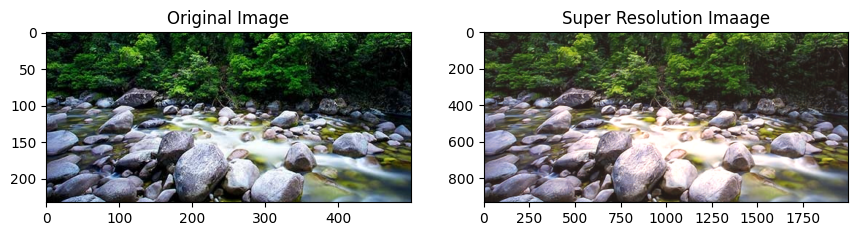

In [ ]:
from keras.models import load_model

img_lr = cv2.imread("/content/img.jpg")
img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
img_lr = np.array(img_lr)
img_lr = img_lr/255
img_lr = np.expand_dims(img_lr, axis=0)
print(img_lr.shape)

img = cv2.imread("/content/img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img)
img = img/255

gen= load_model('/content/drive/MyDrive/GAN/g_14.h5', compile=False)
gen_image= gen.predict(img_lr)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(img_lr[0,:,:,:])
plt.subplot(232)
plt.title('Super Resolution Imaage')
plt.imshow(gen_image[0,:,:,:])

In [ ]:
gen_image.shape

(1, 932, 2000, 3)

In [ ]:
save_img = gen_image

In [ ]:
save_img = save_img[0, :, :, :]

In [ ]:
normalized_img = np.clip(save_img, 0, 1)

In [ ]:
plt.imsave("SR.jpg",normalized_img)